In [18]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#The usage of the function whene the row range is double

def double_range_extract(start_col : int, end_col: int, start_row1: int, end_row1: int, start_row2: int, end_row2: int, type:str, area: str, csv_name:str,path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
#         if sheet.endswith('-'):
#             sheet = sheet[:-1]
#         else:
#             sheet = sheet
            
#         if "--" in sheet:
#             sheet = sheet.replace("--", "-")
#         else:
#             sheet = sheet
        
        print(worksheet)
        print(sheet)
        
    
        
         # Initialize the sum to 0
            # Initialize the sum to 0
        total_sum = 0

        # Loop over each row in the first range
        for row in worksheet.iter_rows(min_row=start_row1, max_row=end_row1):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # Loop over each row in the second range
        for row in worksheet.iter_rows(min_row=start_row2, max_row=end_row2):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # # Return the total sum
        # return total_sum
        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df[:-1]
    print(result_df.size)
    result_df['date'] = result_df['date'] + "-2020"
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%Y")
    result_df.to_csv(csv_name)
    print(csv_name)
    


In [6]:
double_range_extract(start_col =7, end_col= 9, start_row1= 22, end_row1= 26, start_row2= 23, end_row2=54, type = 'Infected_Cases', area= 'Dhaka', csv_name='CSV/2021/Dhaka_infected_dengue.csv',path="2021/2. Daily Dengue Dhaka City  2021.xlsx")

<Worksheet "31.12">
31-12
<Worksheet "30.12">
30-12
<Worksheet "29.12">
29-12
<Worksheet "28.12">
28-12
<Worksheet "27.12">
27-12
<Worksheet "26.12">
26-12
<Worksheet "25.12">
25-12
<Worksheet "24.12">
24-12
<Worksheet "23.12">
23-12
<Worksheet "22.12">
22-12
<Worksheet "21.12">
21-12
<Worksheet "20.12">
20-12
<Worksheet "19.12">
19-12
<Worksheet "18.12">
18-12
<Worksheet "17.12">
17-12
<Worksheet "16.12">
16-12
<Worksheet "15.12">
15-12
<Worksheet "14.12">
14-12
<Worksheet "13.12">
13-12
<Worksheet "12.12">
12-12
<Worksheet "11.12">
11-12
<Worksheet "10.12">
10-12
<Worksheet "09.12">
09-12
<Worksheet "08.12">
08-12
<Worksheet "07.12">
07-12
<Worksheet "06.12">
06-12
<Worksheet "05.12">
05-12
<Worksheet "04.12">
04-12
<Worksheet "03.12">
03-12
<Worksheet "02.12">
02-12
<Worksheet "01.12">
01-12
<Worksheet "30.11">
30-11
<Worksheet "29.11">
29-11
<Worksheet "28.11">
28-11
<Worksheet "27.11">
27-11
<Worksheet "26.11">
26-11
<Worksheet "25.11">
25-11
<Worksheet "24.11">
24-11
<Worksheet "

In [10]:
def visual(csv_path: str ):
    # Load data into a DataFrame
    df = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')
    # Create a plot of total infected cases over time
    ax = df.plot(y=df.columns[1], legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel(df.columns[1])
    ax.set_title(f'Total Dengue {df.columns[1]} Cases in {df[df.columns[2]].unique()} Inner Over Time')
    plt.show()

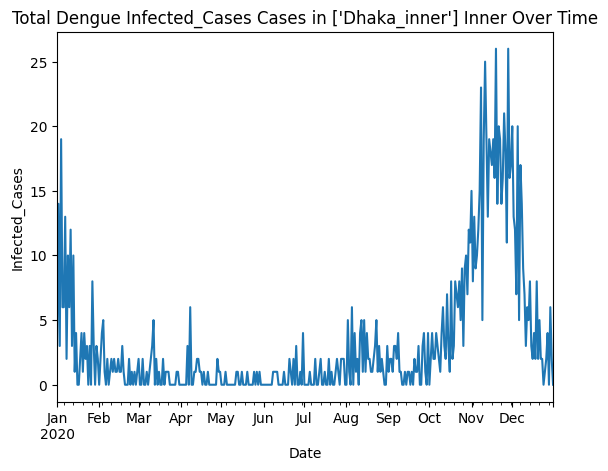

In [5]:
visual('CSV/Dhaka_infected_dengue.csv')

In [4]:
#The usage of the function whene the row range is single

def single_range_extract(start_col: int, end_col: int, start_row: int, end_row: int, type:str, area: str, csv_name:str, path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
         # Initialize the sum to 0
       # Initialize the sum to 0
        total_sum = 0


        # Loop over each row in the range
        for row in worksheet.iter_rows(min_row=start_row, max_row=end_row):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:
                    
                     if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value


        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df[:-1]
    result_df['date'] = result_df['date'] + "-2020"
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%Y")
    result_df.to_csv(csv_name)
    print(csv_name)

In [16]:
single_range_extract(start_col= 7, end_col= 9, start_row= 81, end_row= 85, type="Infected", area = "Sylhet", csv_name="Sylhet_Dengue_2020.csv", path ="3. Daily Dengue Bangladesh   2022.xlsx")

01.01
01.02
01.03
01.04
01.05
01.06
01.07
01.08
01.09
01.10
01.11
01.12
02.01
02.02
02.03
02.04
02.05
02.06
02.07
02.08
02.09
02.10
02.11
02.12
03.01
03.02
03.03
03.04
03.05
03.06
03.07
03.08
03.09
03.10
03.11
03.12
04.01
04.02
04.03
04.04
04.05
04.06
04.07
04.08
04.09
04.10
04.11
04.12
05.01
05.02
05.03
05.04
05.05
05.06
05.07
05.08
05.09
05.10
05.11
05.12
06.01
06.02
06.03
06.04
06.05
06.06
06.07
06.08
06.09
06.10
06.11
06.12
07.01
07.02
07.03
07.04
07.05
07.06
07.07
07.08
07.09
07.10
07.11
07.12
08.01
08.02
08.03
08.04
08.05
08.06
08.07
08.08
08.09
08.10
08.11
08.12
09.01
09.02
09.03
09.04
09.05
09.06
09.07
09.08
09.09
09.10
09.11
09.12
10.01
10.02
10.03
10.04
10.05
10.06
10.07
10.08
10.09
10.10
10.11
10.12
11.01
11.02
11.03
11.04
11.05
11.06
11.07
11.08
11.09
11.10
11.11
11.12
12.01
12.02
12.03
12.04
12.05
12.06
12.07
12.08
12.09
12.10
12.11
12.12
13.01
13.02
13.03
13.04
13.05
13.06
13.07
13.08
13.09
13.10
13.11
13.12
14.01
14.02
14.03
14.04
14.05
14.06
14.07
14.08
14.09
14.10
14.1

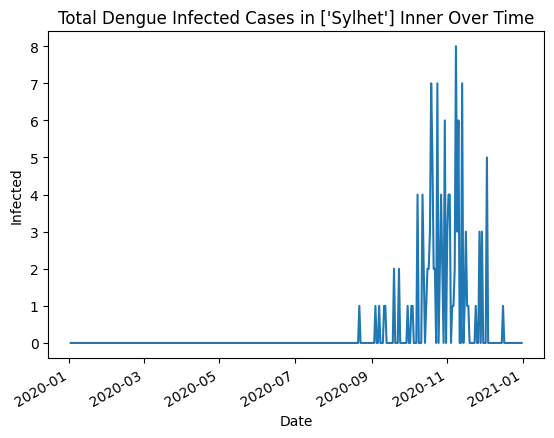

In [17]:
visual('Sylhet_Dengue_2020.csv')

In [17]:
import pandas as pd
deases_file = 'CSV/2020/Sylhet_Dengue_2020.csv'
deases_file = pd.read_csv(deases_file)
deases_file['Area'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [27]:
#The usage of the function whene the row range is double

def double_range_extract1(start_col : int, end_col: int, start_row1: int, end_row1: int, start_row2: int, end_row2: int, type:str, area: str, csv_name:str,path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    
    
    type_df = type
    
    area_df = area

   
    # for sheet_name in workbook.sheetnames:
    for month in range(1, 3):
        for day in range(1, 31):
            sheet_name1 = f"{month:02d}.{day:02d}"
            if sheet_name == sheet_name1:
            # do something with the sheet
                worksheet = workbook[sheet_name]
                sheet = sheet_name.replace(")","")
                sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
                sheet = sheet.replace(" ", "")
#         if sheet.endswith('-'):
#             sheet = sheet[:-1]
#         else:
#             sheet = sheet
            
#         if "--" in sheet:
#             sheet = sheet.replace("--", "-")
#         else:
#             sheet = sheet
        
        print(worksheet)
        print(sheet)
        
    
        
         # Initialize the sum to 0
            # Initialize the sum to 0
        total_sum = 0

        # Loop over each row in the first range
        for row in worksheet.iter_rows(min_row=start_row1, max_row=end_row1):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # Loop over each row in the second range
        for row in worksheet.iter_rows(min_row=start_row2, max_row=end_row2):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # # Return the total sum
        # return total_sum
        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df[:-1]
    print(result_df.size)
    result_df['date'] = result_df['date'] + "-2020"
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%Y")
    result_df.to_csv(csv_name)
    print(csv_name)
    


In [28]:
double_range_extract1(start_col =5, end_col= 7, start_row1= 7, end_row1= 21, start_row2= 23, end_row2=54, type = 'Infected_Cases', area= 'Dhaka', csv_name='Dhaka_infected_dengue.csv',path="2. Daily Dengue Dhaka City   2022.xlsx")

01.05
01.06
01.07
01.08
01.09
01.10
01.11
01.12
02.05
02.06
02.07
02.08
02.09
02.10
02.11
02.12
03.05
03.06
03.07
03.08
03.09
03.10
03.11
03.12
04.05
04.06
04.07
04.08
04.09
04.10
04.11
04.12
05.05
05.06
05.07
05.08
05.09
05.10
05.11
05.12
06.05
06.06
06.07
06.08
06.09
06.10
06.11
06.12
07.05
07.06
07.07
07.08
07.09
07.10
07.11
07.12
08.05
08.06
08.07
08.08
08.09
08.10
08.11
08.12
09.04
09.05
09.06
09.07
09.08
09.09
09.10
09.11
09.12
10.04
10.05
10.06
10.07
10.08
10.09
10.10
10.11
10.12
11.04
11.05
11.06
11.07
11.08
11.09
11.10
11.11
11.12
12.04
12.05
12.06
12.07
12.08
12.09
12.10
12.11
12.12
13.04
13.05
13.06
13.07
13.08
13.09
13.10
13.11
13.12
14.04
14.05
14.06
14.07
14.08
14.09
14.10
14.11
14.12
15.04
15.05
15.06
15.07
15.08
15.09
15.10
15.11
15.12
16.04
16.05
16.06
16.07
16.08
16.09
16.10
16.11
16.12
17.04
17.05
17.06
17.07
17.08
17.09
17.10
17.11
17.12
18.04
18.05
18.06
18.07
18.08
18.09
18.10
18.11
18.12
19.04
19.05
19.06
19.07
19.08
19.09
19.10
19.11
19.12
20.04
20.05
20.06
20.0

NameError: name 'sheet_name' is not defined